### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

### The Data Source

Dr Semmelweis published his research in 1861. Scanned pages can be found here: [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), and a [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

# to register date converters to avoid warning messages (used in next cell)
from pandas.plotting import register_matplotlib_converters

### Notebook Changes

In [2]:
# display of float numbers
pd.options.display.float_format = '{:,.2f}'.format

# create locators on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

register_matplotlib_converters()

#to force static image output for github
%matplotlib inline 

### Read Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')

# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

In [4]:
print(df_yearly.shape)
df_yearly

(12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
print(df_monthly.shape)
df_monthly.tail()

(98, 3)


,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


### Check for Nan Values and Duplicates

In [6]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [7]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [8]:
# Alternative to using .info()
print(f'Yearly NA values: {df_monthly.isna().values.any()}')
print(f'Monthly NA values: {df_yearly.isna().values.any()}')

Yearly NA values: False
Monthly NA values: False


In [9]:
print(f'Yearly duplicates: {df_yearly.duplicated().values.any()}')
print(f'Monthly duplicates: {df_monthly.duplicated().values.any()}')

Yearly duplicates: False
Monthly duplicates: False


### Descriptive Statistics

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [11]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying during Childbirth

In [12]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna during Childbirth: {prob:.3}%')

Chances of dying in the 1840s in Vienna during Childbirth: 7.08%


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

# Visualise the Total Number of Births and Deaths over Time

### Plot the Monthly Data on Twin Axes

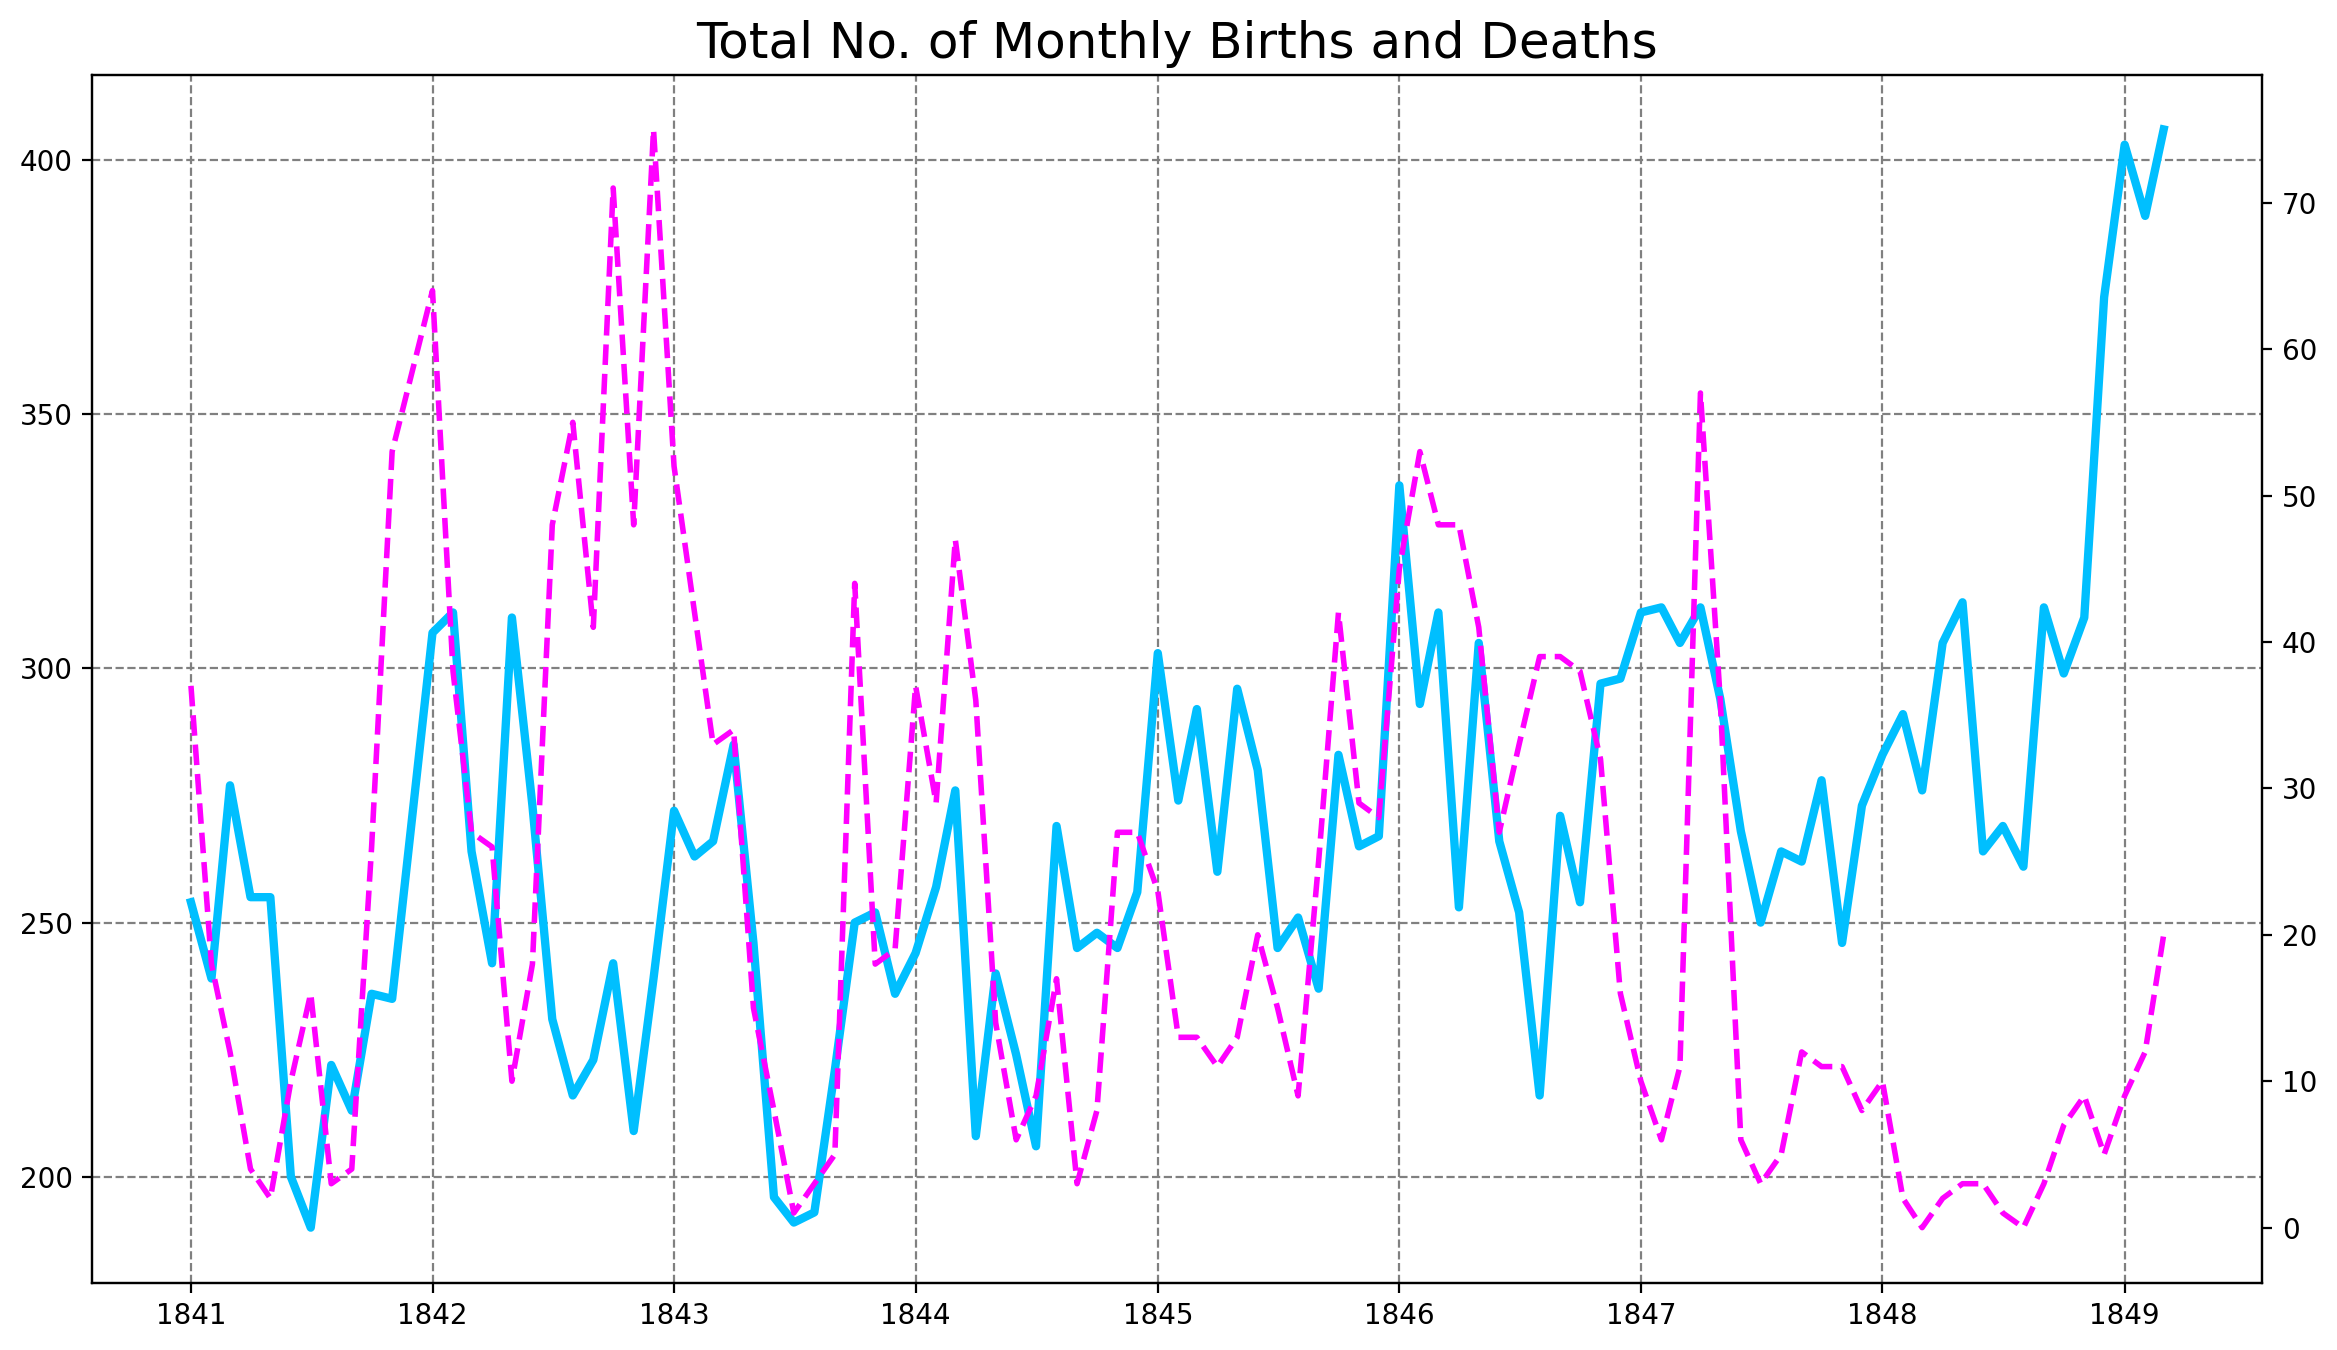

In [13]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total No. of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='deepskyblue', 
         linewidth=3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='fuchsia', 
         linewidth=2, 
         linestyle='--')

plt.show()

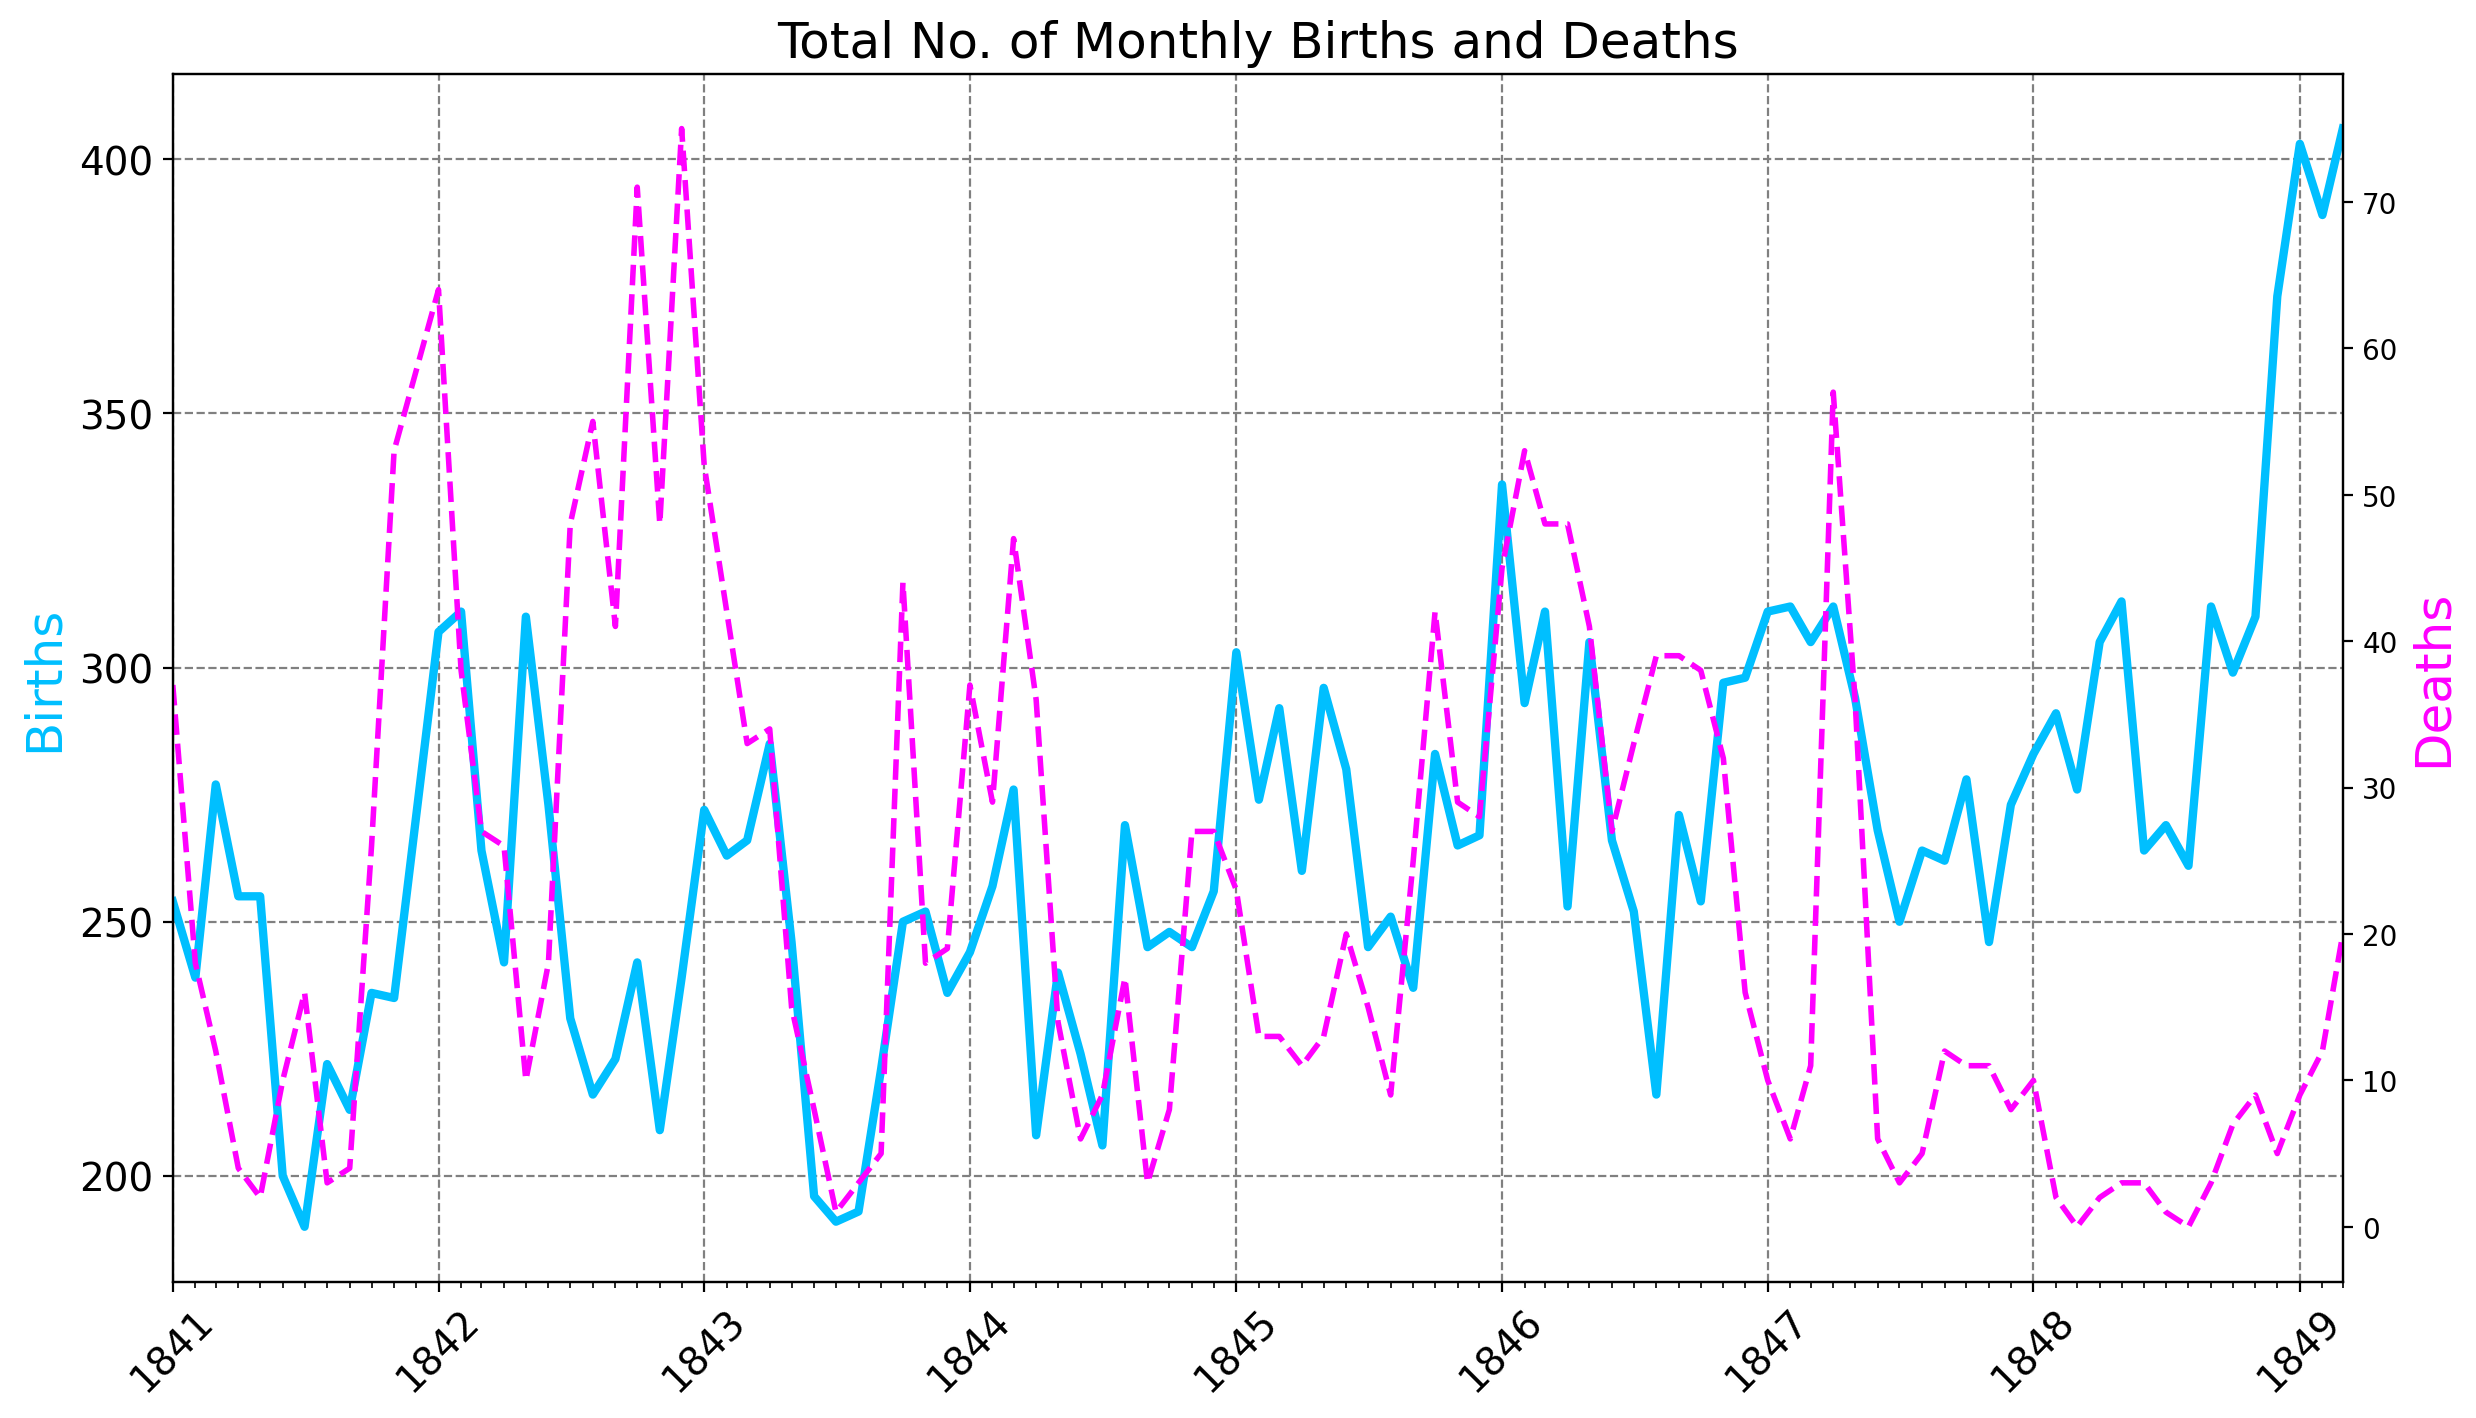

In [14]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total No. of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='deepskyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='fuchsia', fontsize=18)

# Add locators for tick marks
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='deepskyblue', 
         linewidth=3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='fuchsia', 
         linewidth=2, 
         linestyle='--')

plt.show()

# The Yearly Data Split by Clinic

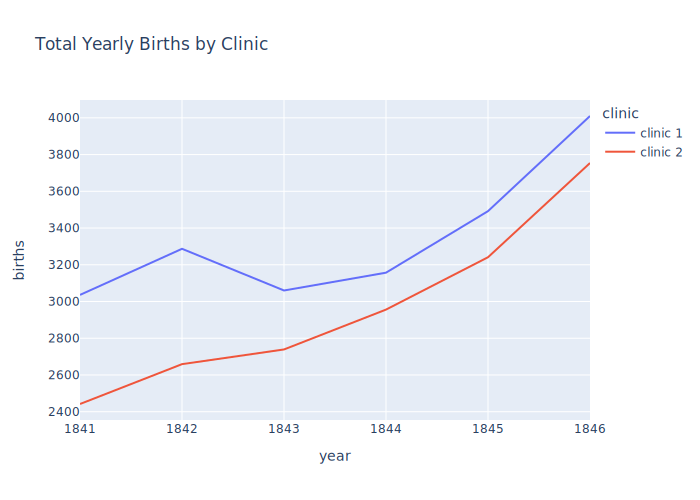

In [15]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')

line.show("svg", engine="kaleido")

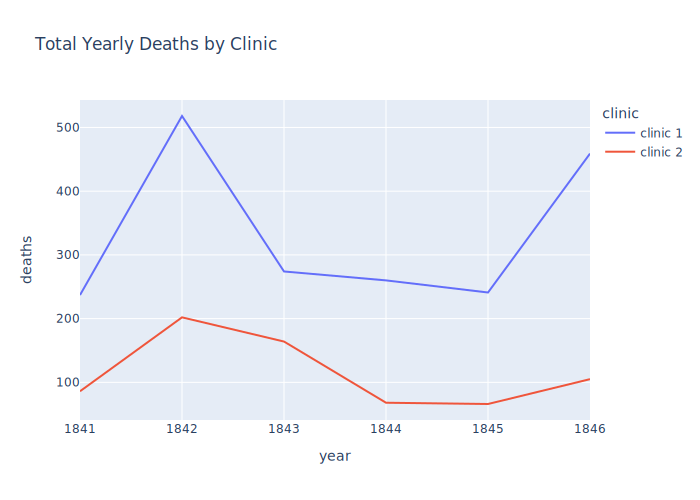

In [16]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')

line.show("svg", engine="kaleido")

### Calculate the Proportion of Deaths at Each Clinic

In [17]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [18]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [19]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


### Plotting the Proportion of Yearly Deaths by Clinic

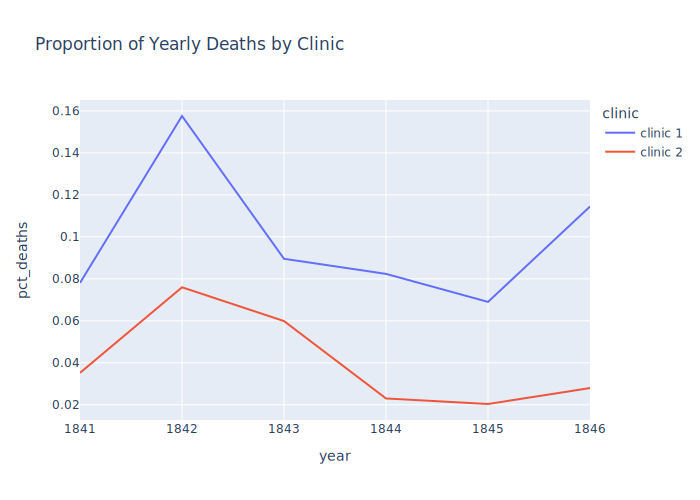

In [20]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')

line.show("svg", engine="kaleido")

# The Effect of Handwashing

Dr. Semmelweis made handwashing obligatory in the summer of 1947. He ordered people to wash their hands with clorine.

In [21]:
# date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [22]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [23]:
# split monthly into before and after handwashing_start
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [24]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'BEFORE 1847: Average death rate was {bw_rate:.4}%')
print(f'AFTER 1847: Average death rate was {aw_rate:.3}%')

BEFORE 1847: Average death rate was 10.53%
AFTER 1847: Average death rate was 2.15%


### Calculate a Rolling Average of the Death Rate

In [25]:
# convert Date Column to Index first (to not get dropped)
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


### Highlighting Subsections of a Line Chart

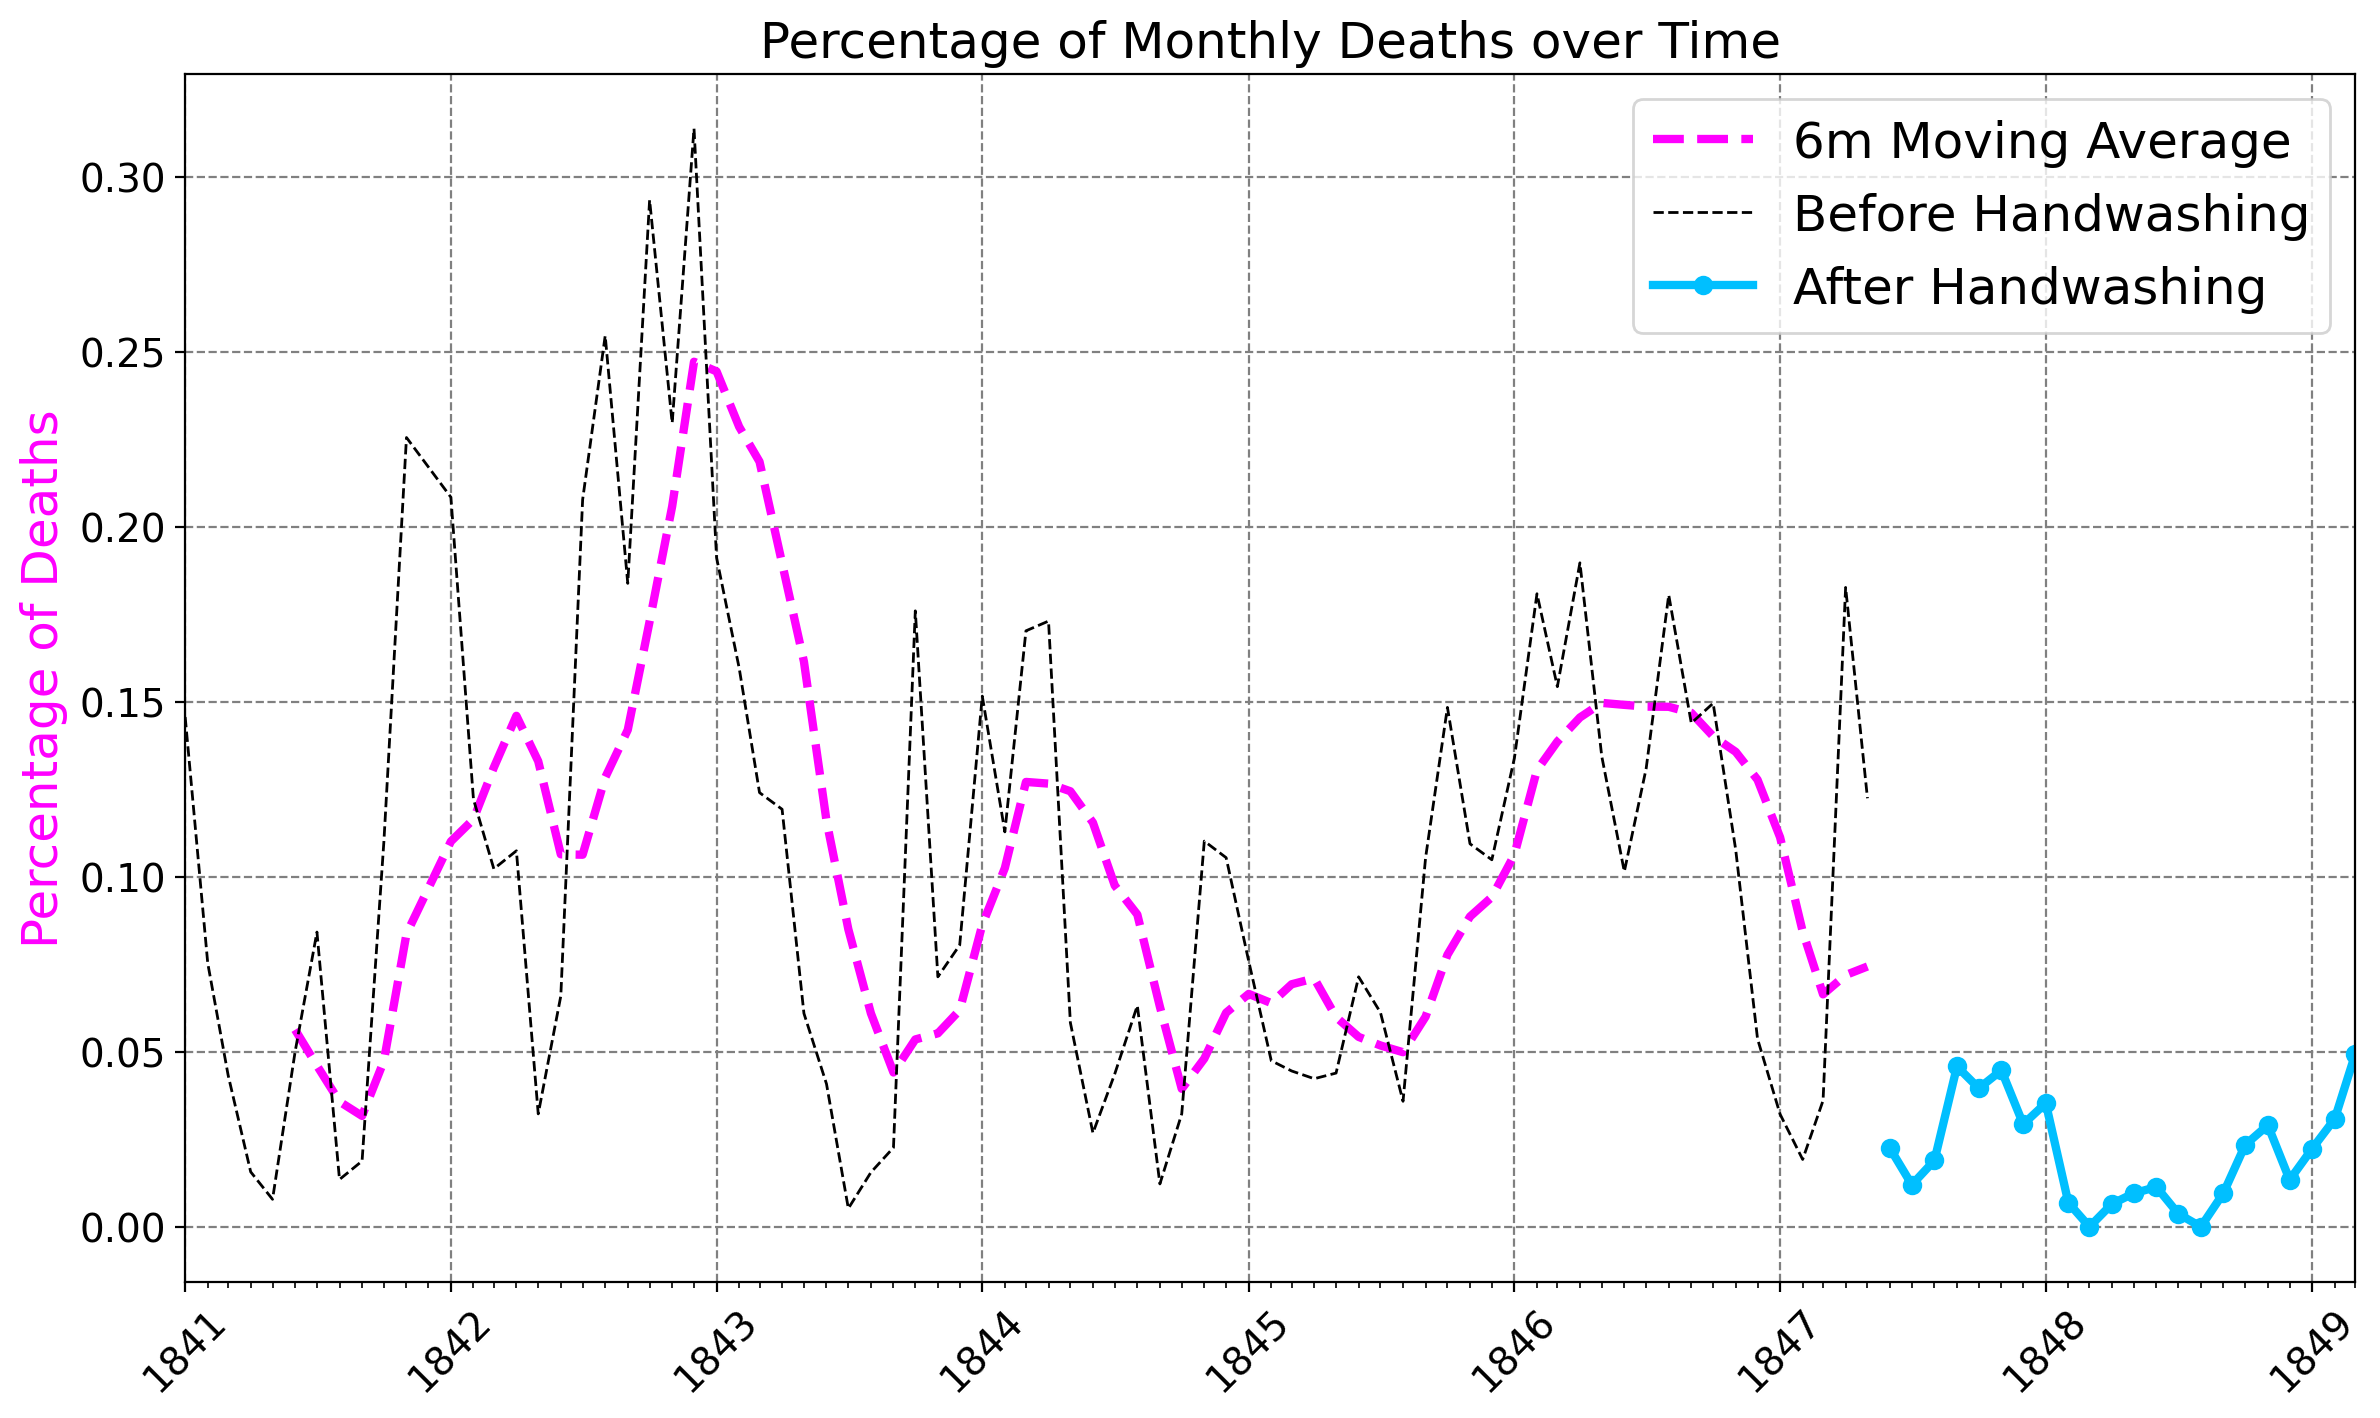

In [26]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='fuchsia', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='fuchsia', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='deepskyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

### Calculate the Difference in the Average Monthly Death Rate

In [27]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'BEFORE handwashing: Chance of death during childbirth: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'AFTER handwashing: Chance of death during childbirth: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

BEFORE handwashing: Chance of death during childbirth: 10.5%.
AFTER handwashing: Chance of death during childbirth: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


### Show how the Death Rate changed Before and After Handwashing (Boxplot)

In [28]:
# if clause - NumPy .where() method
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

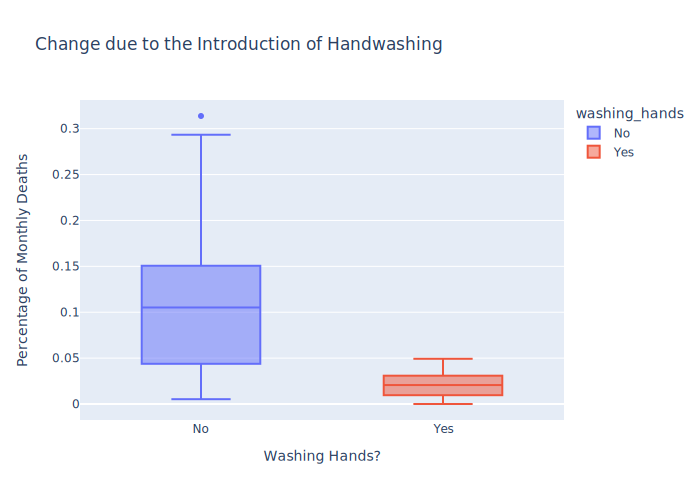

In [29]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='Change due to the Introduction of Handwashing')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show("svg", engine="kaleido")

### Use Histograms to Visualise the Monthly Distribution of Outcomes

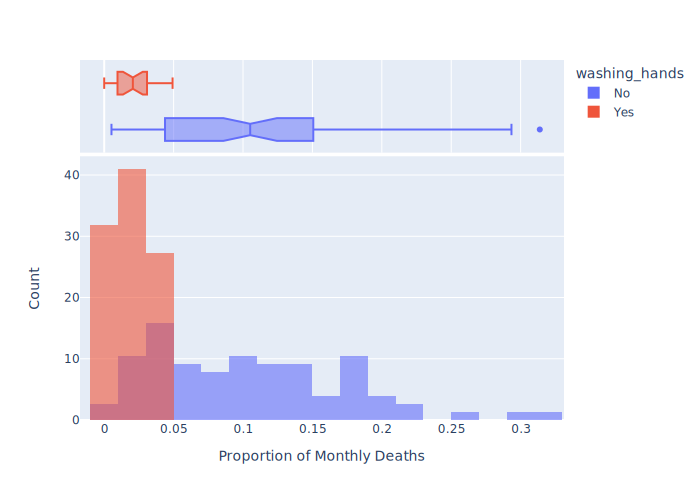

In [30]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show("svg", engine="kaleido")

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution
This can be useful if you want to visualize just the shape of some data, as a kind of continuous replacement for the discrete histogram.

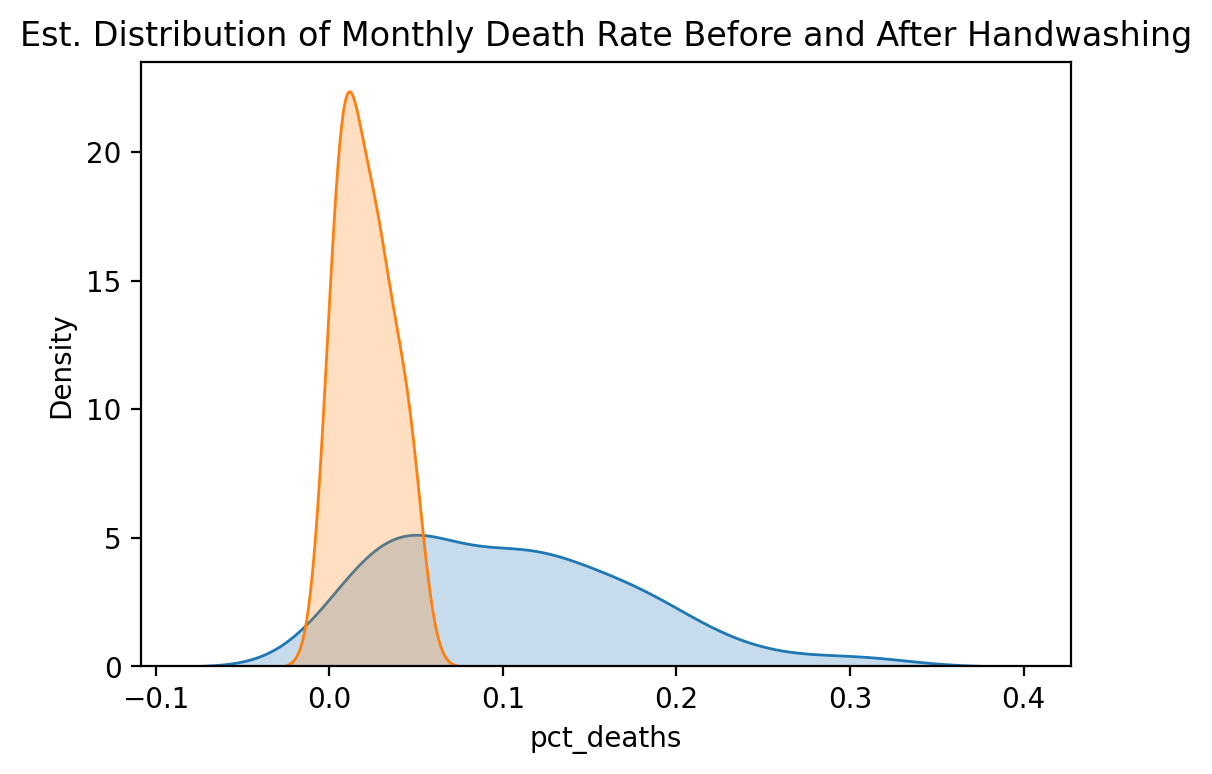

In [31]:
plt.figure(dpi=200)

# the distribution estimate includes a negative death rate (by default)
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

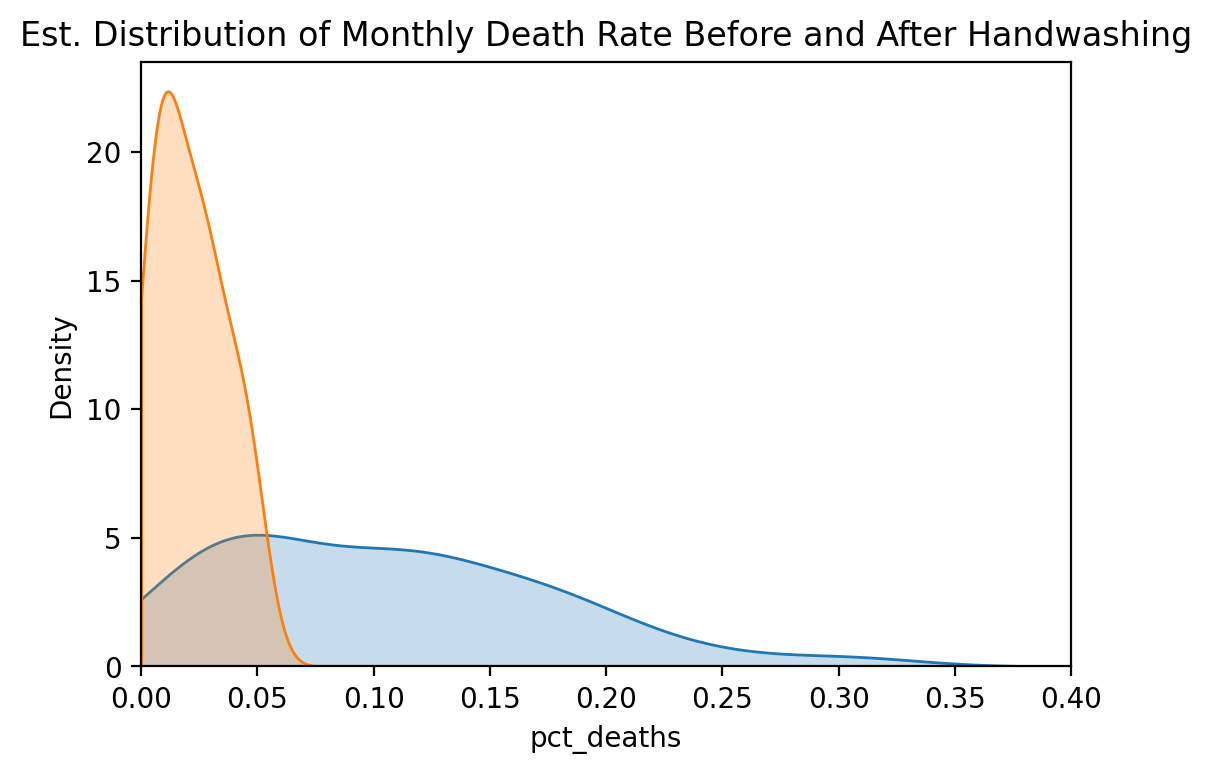

In [32]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

In [33]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512
